# Colon cancer EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('../../data/colon/colon.csv', sep=',', index_col=0)
df.shape

(1858, 16)

In [3]:
# check cols with na and its count
na_cols = df.columns[df.isna().any()].tolist()
na_cols_count = df[na_cols].isna().sum()    
na_cols_count

nodes     36
differ    46
dtype: int64

In [4]:
# Start by subetting data where etype == 2
df = df[df['etype'] == 2]
df.shape

(929, 16)

In [5]:
df.describe()

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
count,929.000000,929.0,929.000000,929.000000,929.000000,929.000000,929.000000,911.000000,929.000000,906.000000,929.000000,929.000000,929.000000,929.000000,929.0
mean,465.000000,1.0,0.520990,59.754575,0.193757,0.029064,0.145318,3.659715,0.486545,2.062914,2.886975,0.265877,0.274489,1669.955867,2.0
std,268.323499,0.0,0.499828,11.948887,0.395453,0.168075,0.352611,3.572562,0.500088,0.514340,0.488149,0.442037,0.446497,872.098960,0.0
min,1.000000,1.0,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,23.000000,2.0
25%,233.000000,1.0,0.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000,806.000000,2.0
50%,465.000000,1.0,1.000000,61.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1976.000000,2.0
75%,697.000000,1.0,1.000000,69.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2364.000000,2.0
max,929.000000,1.0,1.000000,85.000000,1.000000,1.000000,1.000000,33.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3329.000000,2.0


In [6]:
# print number of rows before and after removing missing values
print("Number of rows before removing missing values: ", df.shape[0])
df = df.dropna()
print("Number of rows after removing missing values: ", df.shape[0])

Number of rows before removing missing values:  929
Number of rows after removing missing values:  888


In [7]:
df['status'] = df['status'].map({0: False, 1: True}) 
df = df.reset_index(drop = True)

In [8]:
sns.set_theme(style="white")
cat_colnames = ['rx', 'sex', 'obstruct', 'perfor', 'adhere', 'differ', 'extent', 'surg']
enc = OrdinalEncoder()
encoded = enc.fit_transform(X = df[cat_colnames])
# convert back to df with names
encoded_df = pd.DataFrame(encoded, columns=cat_colnames)

# add the columns not in cat_colnames from df
encoded_df = pd.concat([encoded_df, df.drop(columns=cat_colnames)], axis=1)
encoded_df

,rx,sex,obstruct,perfor,adhere,differ,extent,surg,id,study,age,nodes,status,node4,time,etype
0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1,1,43,5.0,True,1,1521,2
1,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,2,1,63,1.0,False,0,3087,2
2,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,3,1,71,7.0,True,1,963,2
3,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,4,1,66,6.0,True,1,293,2
4,2.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,5,1,69,22.0,True,1,659,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,925,1,71,4.0,False,0,1875,2
884,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,926,1,72,1.0,False,0,2154,2
885,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,927,1,76,1.0,True,0,1018,2
886,1.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,928,1,48,4.0,False,1,2072,2


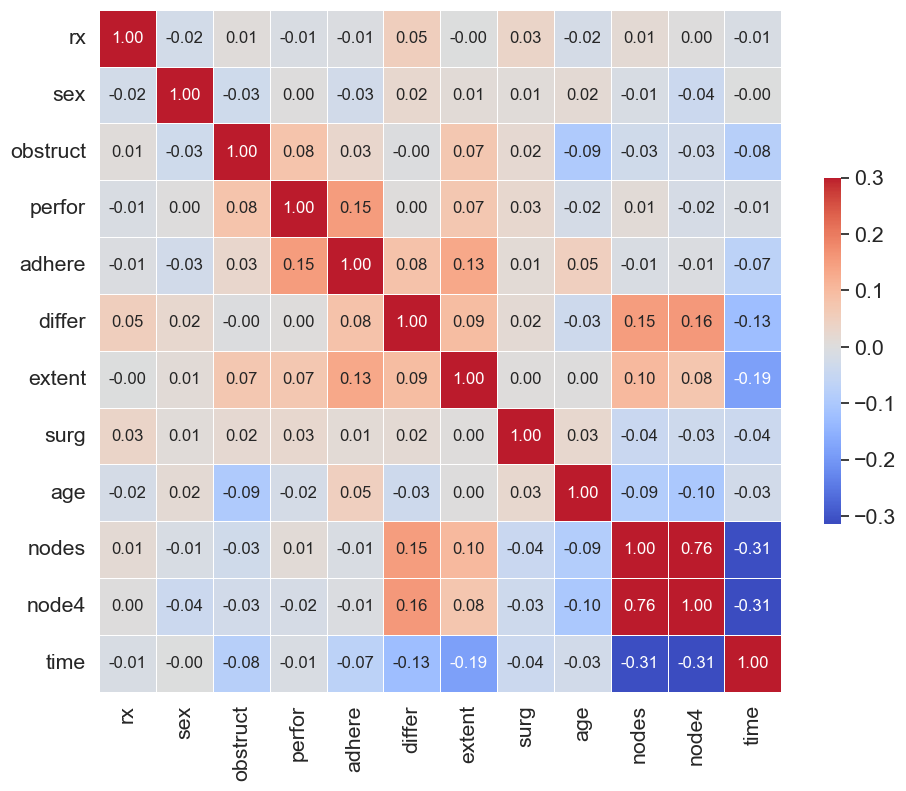

In [9]:
sns.set(font_scale=1.4)
# Compute the correlation matrix
corr = encoded_df.drop(['etype', 'study', 'id', 'status'], axis=1).corr()

# plot corr
f, ax = plt.subplots(figsize=(11, 9))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
# add numbers in the cells
sns.heatmap(corr, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', annot_kws={"size": 12})
#plt.title("Correlation of variables")
plt.show()

f.savefig("../results/figures/colon_data/correlation_matrix_colon.png", bbox_inches='tight', dpi=600)

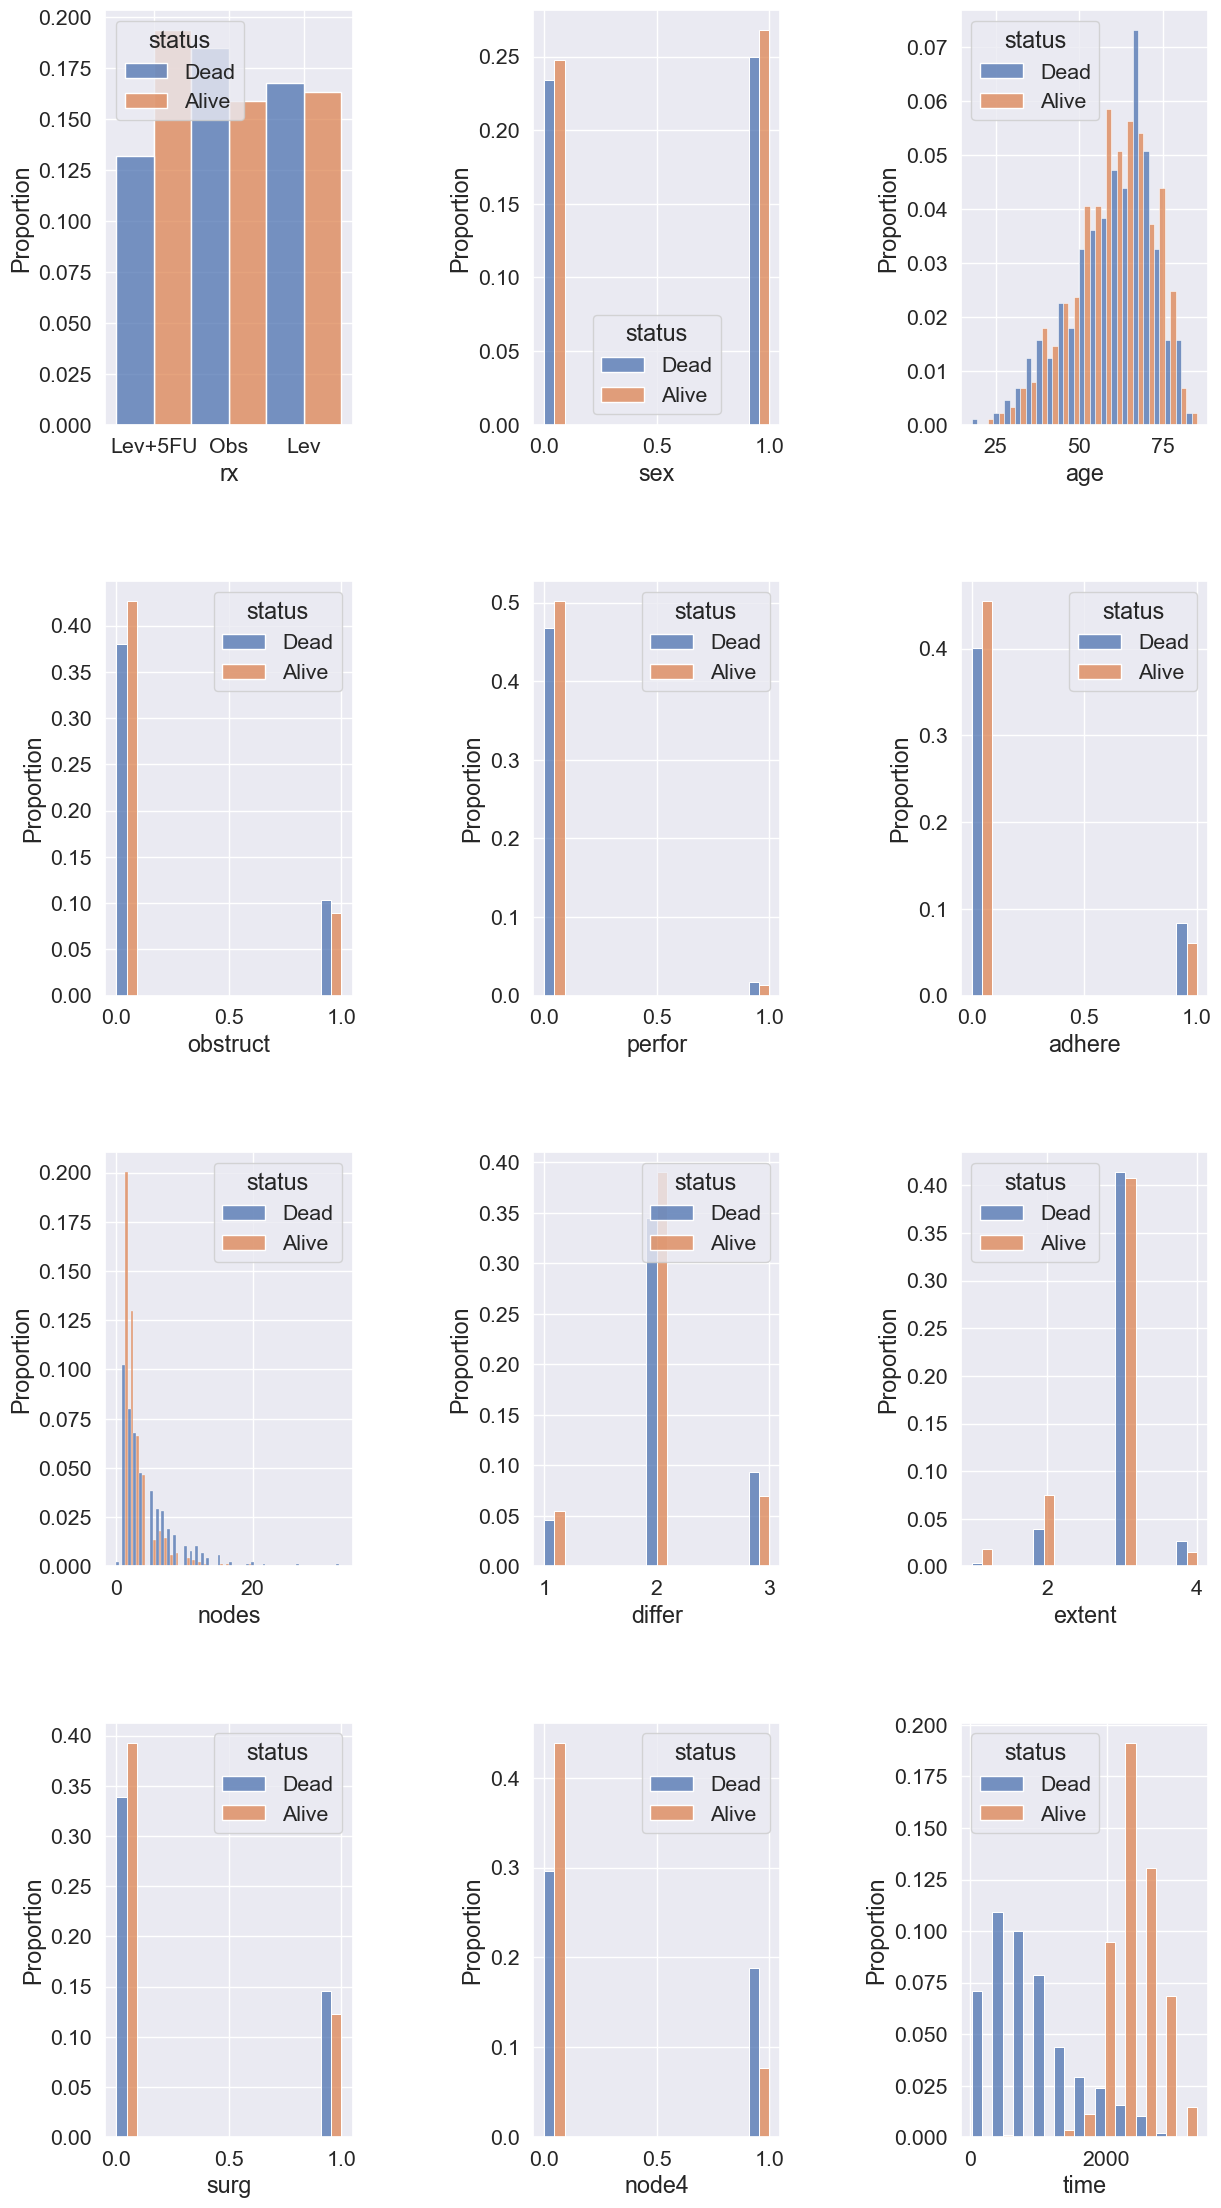

In [10]:
hist_df = df.drop(['etype', 'study', 'id'], axis=1)
hist_df['status'] = hist_df['status'].map({False: "Alive", True: "Dead"})
columns = [col for col in hist_df.columns if col != 'status']

fig, axes = plt.subplots(4, 3, figsize=(14, 24))
fig.tight_layout(pad=5.0)
axes_flat = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=hist_df, 
                 x=col, 
                 hue='status', 
                 stat='proportion', 
                 multiple='dodge', 
                 ax=axes_flat[i])
#fig.suptitle("Distribution of variables", fontsize = 18)
# save the figure
fig.savefig('../results/figures/colon_data/histplot_colon.png')

In [11]:
for col in hist_df.columns:
    if col not in ['time', 'age']:
        print("Class distribution for column: ", col)
        print(hist_df[col].value_counts(normalize=True))
        print("\n")

Class distribution for column:  rx
rx
Obs        0.343468
Lev        0.331081
Lev+5FU    0.325450
Name: proportion, dtype: float64


Class distribution for column:  sex
sex
1    0.518018
0    0.481982
Name: proportion, dtype: float64


Class distribution for column:  obstruct
obstruct
0    0.807432
1    0.192568
Name: proportion, dtype: float64


Class distribution for column:  perfor
perfor
0    0.969595
1    0.030405
Name: proportion, dtype: float64


Class distribution for column:  adhere
adhere
0    0.855856
1    0.144144
Name: proportion, dtype: float64


Class distribution for column:  nodes
nodes
1.0     0.302928
2.0     0.209459
3.0     0.134009
4.0     0.093468
5.0     0.051802
6.0     0.047297
7.0     0.042793
8.0     0.024775
9.0     0.022523
10.0    0.014640
12.0    0.012387
11.0    0.011261
13.0    0.007883
15.0    0.006757
14.0    0.004505
19.0    0.002252
20.0    0.002252
0.0     0.002252
17.0    0.002252
33.0    0.001126
22.0    0.001126
27.0    0.001126
16.0    0.00112

## Features scaling test

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
t = sc.fit_transform(df[["sex", "age"]])
dft = pd.DataFrame(t, columns=sc.feature_names_in_)
dft

,sex,age
0,0.964590,-1.411750
1,0.964590,0.267824
2,-1.036709,0.939653
3,-1.036709,0.519760
4,0.964590,0.771696
...,...,...
883,0.964590,0.939653
884,-1.036709,1.023632
885,0.964590,1.359547
886,-1.036709,-0.991856
